In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [3]:
data_train = pd.read_csv('C:/Users/ASUS/Downloads/VIX Home Credit Indonesia Data Scientist Project Based Internship Program/application_train.csv')
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Persentase Gagal Bayar (TARGET = 1): 8.07%
Persentase Berhasil Bayar (TARGET = 0): 91.93%


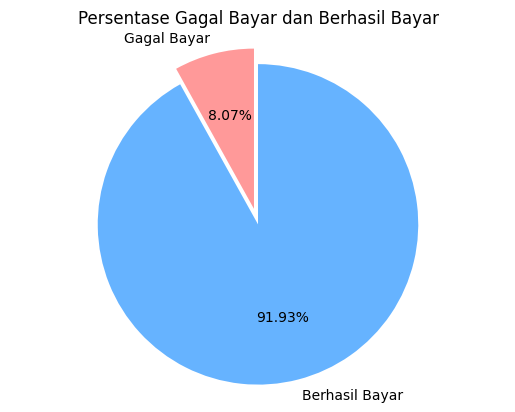

In [4]:
target_counts = data_train['TARGET'].value_counts()
failed_payments = target_counts[1]
successful_payments = target_counts[0]

failed_percentage = (failed_payments / len(data_train)) * 100
successful_percentage = (successful_payments / len(data_train)) * 100

print("Persentase Gagal Bayar (TARGET = 1): {:.2f}%".format(failed_percentage))
print("Persentase Berhasil Bayar (TARGET = 0): {:.2f}%".format(successful_percentage))

labels = ['Gagal Bayar', 'Berhasil Bayar']
sizes = [failed_percentage, successful_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title('Persentase Gagal Bayar dan Berhasil Bayar')
plt.show()

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='TARGET', ylabel='count'>

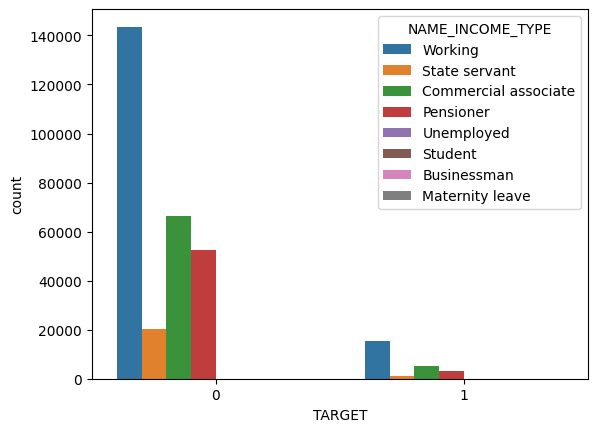

In [5]:
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=data_train)

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='TARGET', ylabel='count'>

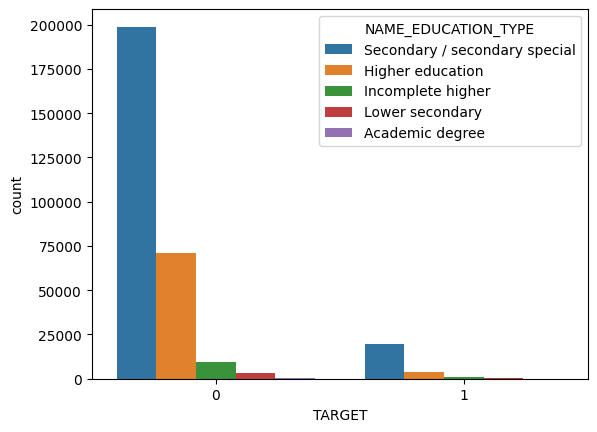

In [6]:
sns.countplot(x='TARGET',hue='NAME_EDUCATION_TYPE',data=data_train)

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='TARGET', ylabel='count'>

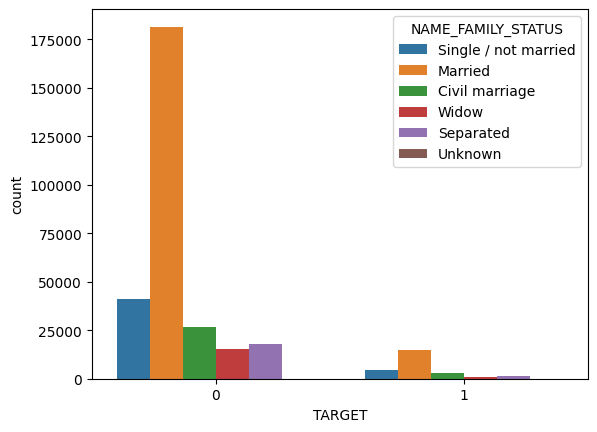

In [7]:
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=data_train)

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='TARGET', ylabel='count'>

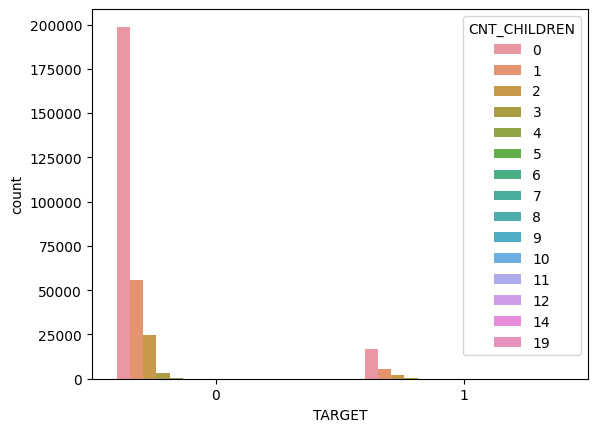

In [8]:
sns.countplot(x='TARGET',hue='CNT_CHILDREN',data=data_train)

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\U

<Figure size 800x800 with 0 Axes>

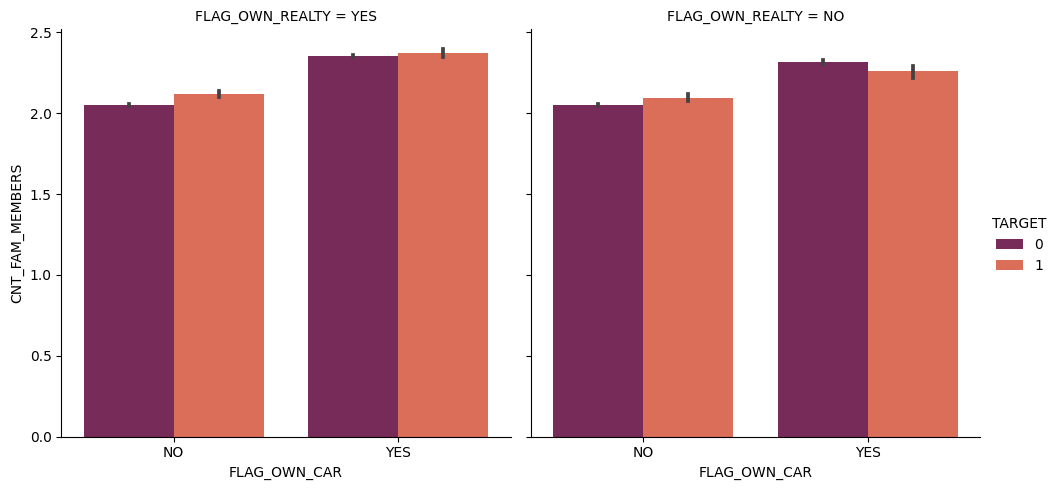

In [9]:
data_train = data_train.replace({'N':'NO', 'Y':'YES'})
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = data_train, x = 'FLAG_OWN_CAR',
            y = 'CNT_FAM_MEMBERS', col = 'FLAG_OWN_REALTY', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\U

<Figure size 3000x3000 with 0 Axes>

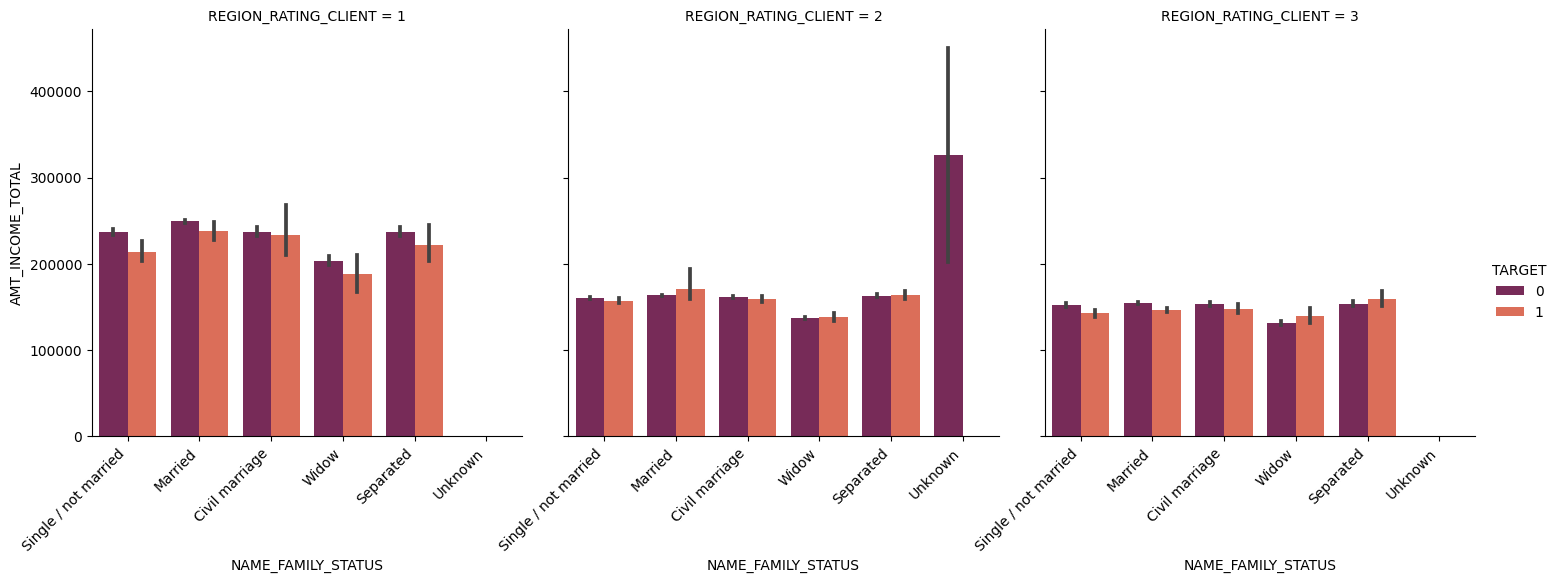

In [10]:
fig = plt.figure(figsize=(30,30))
ax = sns.catplot(data = data_train, x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL', hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\U

<Figure size 3000x3000 with 0 Axes>

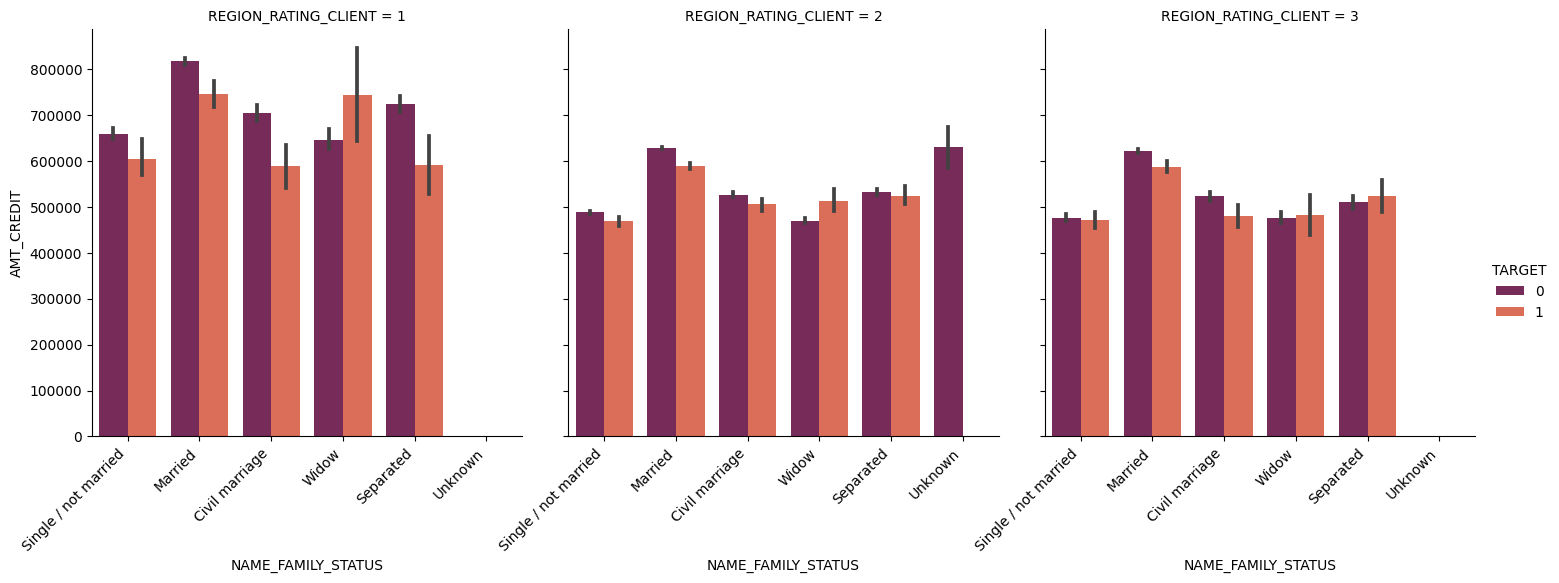

In [11]:
fig = plt.figure(figsize=(30,30))
ax = sns.catplot(data = data_train, x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT', hue = 'TARGET', 
            col = 'REGION_RATING_CLIENT', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\U

<Figure size 800x800 with 0 Axes>

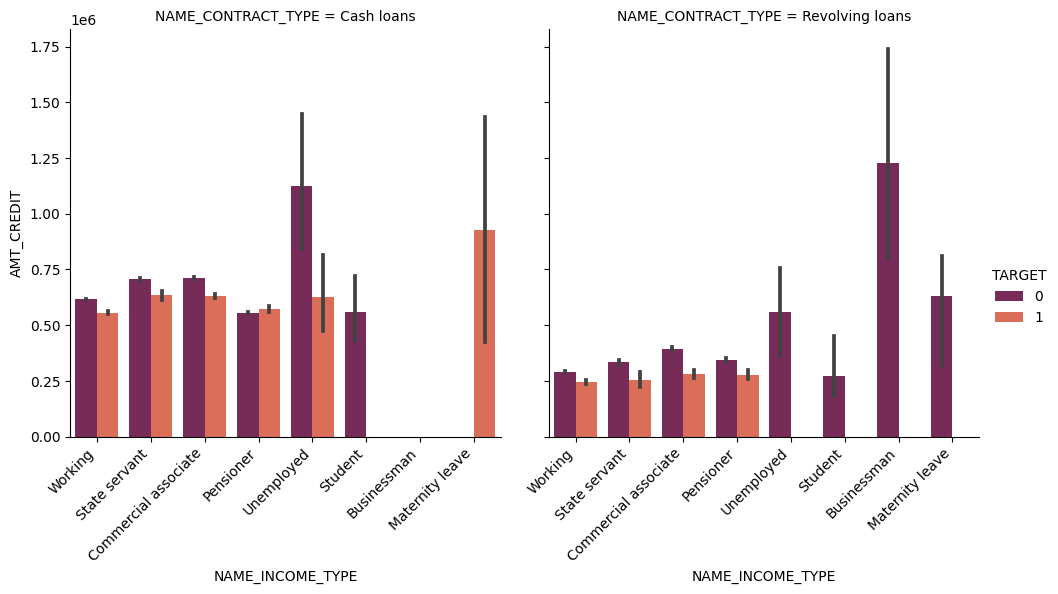

In [13]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = data_train, x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', col = 'NAME_CONTRACT_TYPE', 
            hue = 'TARGET', kind = 'bar', palette = 'rocket',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

In [14]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


In [15]:
#cek data duplikat
data_train.duplicated().sum()

0

In [16]:
#pengecekan data yang hilang
data_train.isna().sum().head(20)

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
dtype: int64

In [17]:
# Memilih Variabel Penjelas yang akan digunakan untuk pembentukan model regresi logistik
selected_columns = ['TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']
data_train_subset = data_train[selected_columns]
data_train_subset

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,M,NO,YES,0,202500.0,406597.5,24700.5,351000.0
1,0,F,NO,NO,0,270000.0,1293502.5,35698.5,1129500.0
2,0,M,YES,YES,0,67500.0,135000.0,6750.0,135000.0
3,0,F,NO,YES,0,135000.0,312682.5,29686.5,297000.0
4,0,M,NO,YES,0,121500.0,513000.0,21865.5,513000.0
...,...,...,...,...,...,...,...,...,...
307506,0,M,NO,NO,0,157500.0,254700.0,27558.0,225000.0
307507,0,F,NO,YES,0,72000.0,269550.0,12001.5,225000.0
307508,0,F,NO,YES,0,153000.0,677664.0,29979.0,585000.0
307509,1,F,NO,YES,0,171000.0,370107.0,20205.0,319500.0


In [18]:
#pengecekan spelling word pada data yang sudah di subset
print(data_train_subset['TARGET'].unique(),'\n',
      data_train_subset['CODE_GENDER'].unique(),'\n',
      data_train_subset['FLAG_OWN_CAR'].unique(),'\n',
      data_train_subset['FLAG_OWN_REALTY'].unique(),'\n',
      data_train_subset['AMT_GOODS_PRICE'].unique())

[1 0] 
 ['M' 'F' 'XNA'] 
 ['NO' 'YES'] 
 ['YES' 'NO'] 
 [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]


In [19]:
#Menangani kategori XNA di CODE_GENDER
data_train_subset.drop(data_train_subset.index[data_train_subset['CODE_GENDER']=='XNA'],inplace=True)
data_train_subset.CODE_GENDER.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12872\313676582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_subset.drop(data_train_subset.index[data_train_subset['CODE_GENDER']=='XNA'],inplace=True)


array(['M', 'F'], dtype=object)

In [20]:
# Preprocessing kolom kategorikal
categorical_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
categorical_columns

['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [21]:
data_pakai= data_train_subset.copy()
data_pakai.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,M,NO,YES,0,202500.0,406597.5,24700.5,351000.0
1,0,F,NO,NO,0,270000.0,1293502.5,35698.5,1129500.0
2,0,M,YES,YES,0,67500.0,135000.0,6750.0,135000.0
3,0,F,NO,YES,0,135000.0,312682.5,29686.5,297000.0
4,0,M,NO,YES,0,121500.0,513000.0,21865.5,513000.0


In [22]:
# Label Encoder untuk kolom kategorikal
data_pakai[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] = data_pakai[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].apply(LabelEncoder().fit_transform)
data_pakai.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,1,0,1,0,202500.0,406597.5,24700.5,351000.0
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0
2,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0
3,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0
4,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0


In [23]:
#pengecekan data hilang sekali lagi
data_pakai.isna().sum().head(20)

TARGET                0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY          12
AMT_GOODS_PRICE     278
dtype: int64

In [24]:
# Preprocessing kolom numerik
numeric_columns = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']
numeric_columns

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE']

In [25]:
# Penanganan data hilang pada kolom numerik
imputer = SimpleImputer(strategy='mean')
data_pakai[numeric_columns] = imputer.fit_transform(data_pakai[numeric_columns])
data_pakai.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,1,0,1,0.0,202500.0,406597.5,24700.5,351000.0
1,0,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0
2,0,1,1,1,0.0,67500.0,135000.0,6750.0,135000.0
3,0,0,0,1,0.0,135000.0,312682.5,29686.5,297000.0
4,0,1,0,1,0.0,121500.0,513000.0,21865.5,513000.0


In [26]:
#pengecekan data hilang setelah diatasi
data_pakai.isna().sum().head(20)

TARGET              0
CODE_GENDER         0
FLAG_OWN_CAR        0
FLAG_OWN_REALTY     0
CNT_CHILDREN        0
AMT_INCOME_TOTAL    0
AMT_CREDIT          0
AMT_ANNUITY         0
AMT_GOODS_PRICE     0
dtype: int64

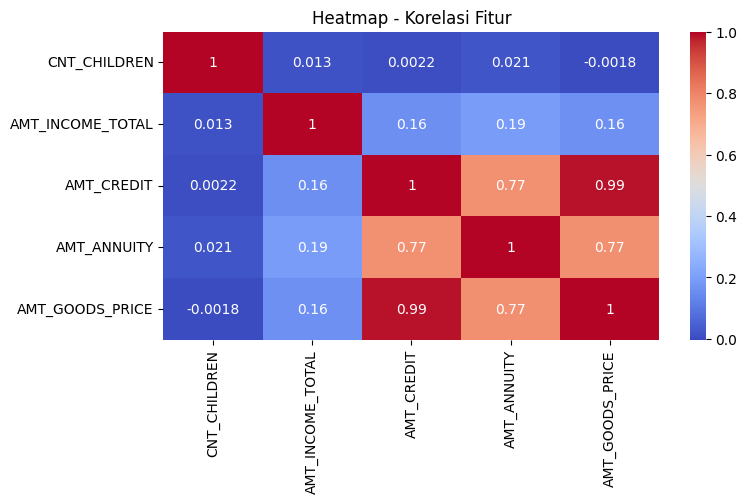

In [28]:
# Heatmap untuk melihat korelasi antara fitur numerik
plt.figure(figsize=(8, 4))
sns.heatmap(data_pakai[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap - Korelasi Fitur')
plt.show()

In [48]:
X = data_pakai.drop('TARGET', axis=1)
Y = data_pakai['TARGET']
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,1,0,1,0.0,202500.0,406597.5,24700.5,351000.0
1,0,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0
2,1,1,1,0.0,67500.0,135000.0,6750.0,135000.0
3,0,0,1,0.0,135000.0,312682.5,29686.5,297000.0
4,1,0,1,0.0,121500.0,513000.0,21865.5,513000.0


In [52]:
from sklearn.utils import resample #re-sampling
# create two different dataframe for majority and minority class 
dfmaj = data_pakai[(data_pakai['TARGET']==0)] 
dfmin = data_pakai[(data_pakai['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(dfmin, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
data_balance = pd.concat([df_minority_upsampled, dfmaj])
data_balance

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
292662,1,0,1,1,0.0,108000.0,213322.5,15651.0,162000.0
194394,1,0,0,0,1.0,99000.0,450000.0,35685.0,450000.0
11104,1,0,0,0,1.0,270000.0,1206954.0,31968.0,945000.0
66953,1,1,1,1,2.0,270000.0,521280.0,31630.5,450000.0
266717,1,0,0,1,0.0,225000.0,454500.0,16825.5,454500.0
...,...,...,...,...,...,...,...,...,...
307505,0,0,0,1,0.0,112500.0,225000.0,22050.0,225000.0
307506,0,1,0,0,0.0,157500.0,254700.0,27558.0,225000.0
307507,0,0,0,1,0.0,72000.0,269550.0,12001.5,225000.0
307508,0,0,0,1,0.0,153000.0,677664.0,29979.0,585000.0


In [85]:

from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2

In [98]:
X = data_balance.drop('TARGET', axis=1)
Y = data_balance['TARGET']
X.head()



,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
292662,0,1,1,0.0,108000.0,213322.5,15651.0,162000.0
194394,0,0,0,1.0,99000.0,450000.0,35685.0,450000.0
11104,0,0,0,1.0,270000.0,1206954.0,31968.0,945000.0
66953,1,1,1,2.0,270000.0,521280.0,31630.5,450000.0
266717,0,0,1,0.0,225000.0,454500.0,16825.5,454500.0


In [99]:
#menentukan data train dan testing
#X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Menampilkan informasi ukuran data train dan data test
print("Jumlah data train:", len(x_train))
print("Jumlah data test:", len(x_test))

print("Jumlah data y train:", len(y_train))
print("Jumlah data y test:", len(y_test))

Jumlah data train: 452294
Jumlah data test: 113074
Jumlah data y train: 452294
Jumlah data y test: 113074


In [109]:
x_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
107802,1,1,1,1.0,270000.0,584766.0,25888.5,472500.0
65790,0,0,0,2.0,81000.0,227520.0,15331.5,180000.0
263571,0,0,0,0.0,99000.0,573628.5,22576.5,463500.0
240822,0,0,0,0.0,270000.0,1546020.0,45202.5,1350000.0
218672,0,1,1,0.0,112500.0,679500.0,27076.5,679500.0


In [121]:
y_train

107802    0
65790     0
263571    1
240822    1
218672    0
         ..
21341     1
67738     1
90472     0
90102     1
215772    1
Name: TARGET, Length: 452294, dtype: int64

In [124]:
y_test

208052    0
80536     0
293062    0
21680     0
85086     1
         ..
87874     1
224260    0
12247     0
13533     0
181115    1
Name: TARGET, Length: 113074, dtype: int64

In [114]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [135]:
# Membuat objek model regresi logistik
logreg_model = LogisticRegression()

# Melatih model data training
model = logreg_model.fit(X_train_scaled, y_train)

# predict data train
y_train_pred = logreg_model.predict_proba(X_train_scaled)[:, 1]

# Menghitung skor AUC-ROC
auc_roc = roc_auc_score(y_train, y_train_pred)
print("Skor AUC-ROC:", auc_roc)


452294
452294
Skor AUC-ROC: 0.6062035003765349


In [105]:
from sklearn.metrics import confusion_matrix, classification_report 

In [136]:
# predict data test
y_test_pred = logreg_model.predict(X_test_scaled)
# print classification report
print('Classification Report Training Model using Logistic Regression:')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model using Logistic Regression:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     56645
           1       0.58      0.58      0.58     56429

    accuracy                           0.58    113074
   macro avg       0.58      0.58      0.58    113074
weighted avg       0.58      0.58      0.58    113074



In [137]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_test_pred)
print("Akurasi:", accuracy)

# Menghitung presisi
precision = precision_score(y_test, y_test_pred)
print("Presisi:", precision)

# Menghitung recall
recall = recall_score(y_test, y_test_pred)
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(y_test, y_test_pred)
print("F1-score:", f1)

# Melakukan validasi silang (cross-validation) dengan 5 lipatan
cv_scores = cross_val_score(logreg_model, X_test_scaled, y_test, cv=5, scoring='roc_auc')
print("Skor AUC-ROC pada validasi silang (cross-validation):", cv_scores.mean())

Akurasi: 0.5784265171480624
Presisi: 0.5775166359903724
Recall: 0.5782842155629198
F1-score: 0.5779001708977891
Skor AUC-ROC pada validasi silang (cross-validation): 0.6070132885215231
